In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
data=pd.read_csv("heart_failure_clinical_dataset.csv")
data.head(10)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.shape

(299, 13)

In [6]:
data.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [15]:
X=pd.DataFrame(data,columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [10]:
Y=data['DEATH_EVENT']
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 299 entries, 0 to 298
Series name: DEATH_EVENT
Non-Null Count  Dtype
--------------  -----
299 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [16]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Text(0.5, 1.0, 'Platelets vs Age')

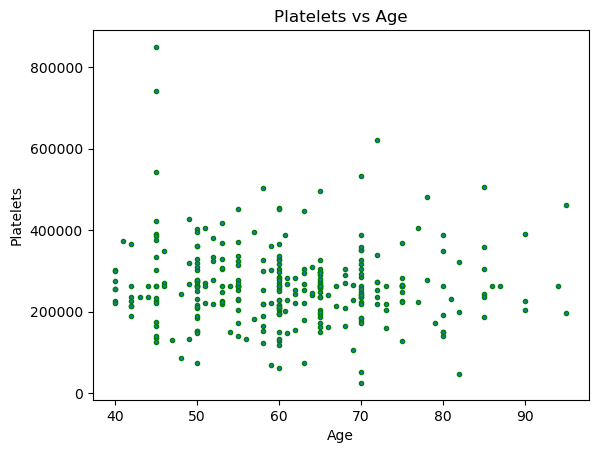

In [17]:
plt.scatter(data['age'], data['platelets'], marker='.', edgecolor='green')
plt.ylabel('Platelets')
plt.xlabel('Age')
plt.title('Platelets vs Age')

Text(0.5, 1.0, 'Creatinine Phosphokinase vs Age')

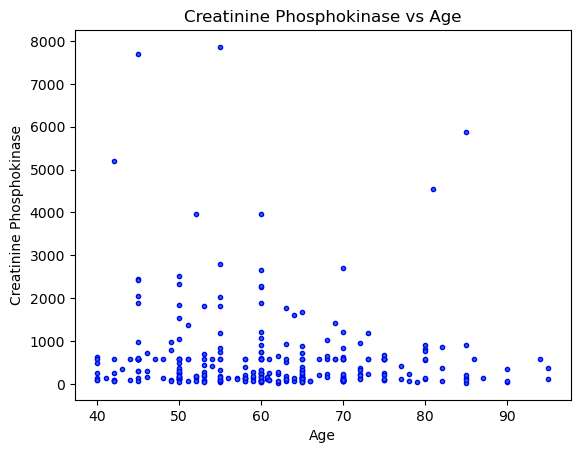

In [18]:
plt.scatter(data['age'], data['creatinine_phosphokinase'], marker='.', edgecolor='blue')
plt.ylabel('Creatinine Phosphokinase')
plt.xlabel('Age')
plt.title('Creatinine Phosphokinase vs Age')

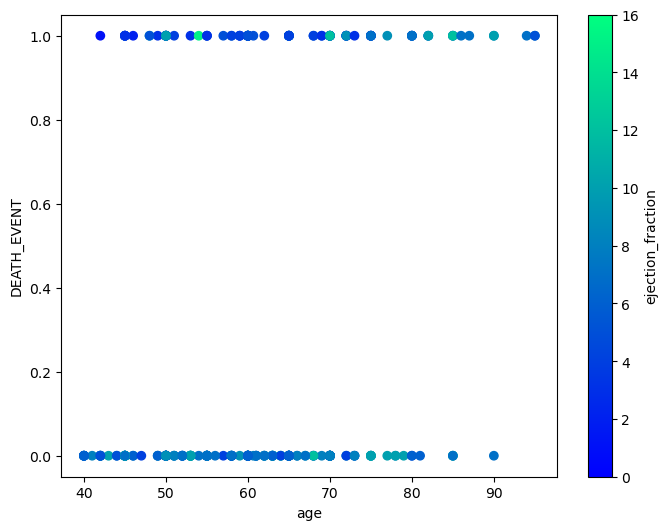

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(x=data["age"], y=data["DEATH_EVENT"], c=data["ejection_fraction"].cat.codes, cmap='winter')
plt.xlabel("age")
plt.ylabel("DEATH_EVENT")
plt.colorbar(label="ejection_fraction")
plt.show() 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)
X_train.shape


(239, 12)

In [30]:
Y_train.shape

(239,)

88.33

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("heart_failure_clinical_dataset.csv")
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "K Neighbors Regressor": KNeighborsRegressor(),
}

X = pd.DataFrame(data, columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                                'ejection_fraction', 'high_blood_pressure', 'platelets',
                                'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

def evaluate_models(X_train, X_test, y_train, y_test, models):
    evaluation_report = {}
    
    for model_name, model_instance in models.items():
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_test)
        
        r2_score_val = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        evaluation_report[model_name] = {
            "R2 SCORE": r2_score_val,
            "MEAN SQUARED ERROR": mse,
            "MEAN ABSOLUTE ERROR": mae,
        }
        
    return evaluation_report

def print_model_metrics(model_metrics):
    for model, metrics in model_metrics.items():
        print(f"{model} Metrics:")
        print(f"  R2 Score: {metrics['R2 SCORE']}")
        print(f"  Mean Squared Error: {metrics['MEAN SQUARED ERROR']}")
        print(f"  Mean Absolute Error: {metrics['MEAN ABSOLUTE ERROR']}")
        print("\n" + "=" * 30 + "\n")

model_metrics = evaluate_models(X_train, X_test, y_train, y_test, models)
print_model_metrics(model_metrics)


Logistic Regression Metrics:
  R2 Score: 0.16149068322981341
  Mean Squared Error: 0.15
  Mean Absolute Error: 0.15


Decision Tree Regressor Metrics:
  R2 Score: 0.16149068322981341
  Mean Squared Error: 0.15
  Mean Absolute Error: 0.15


Random Forest Regressor Metrics:
  R2 Score: 0.5983354037267081
  Mean Squared Error: 0.07185333333333331
  Mean Absolute Error: 0.15066666666666662


K Neighbors Regressor Metrics:
  R2 Score: -0.12173913043478302
  Mean Squared Error: 0.2006666666666667
  Mean Absolute Error: 0.38333333333333336




Logistic Regression:
R2 score: 0.16149068322981341
Mean Squared Error: 0.15
Mean Absolute Error: 0.15
----------
Decision Tree Regressor:
R2 score: 0.16149068322981341
Mean Squared Error: 0.15
Mean Absolute Error: 0.15
----------
Random Forest Regressor:
R2 score: 0.5821614906832298
Mean Squared Error: 0.07474666666666667
Mean Absolute Error: 0.15433333333333332
----------
K Neighbors Regressor:
R2 score: -0.12173913043478302
Mean Squared Error: 0.2006666666666667
Mean Absolute Error: 0.38333333333333336
----------


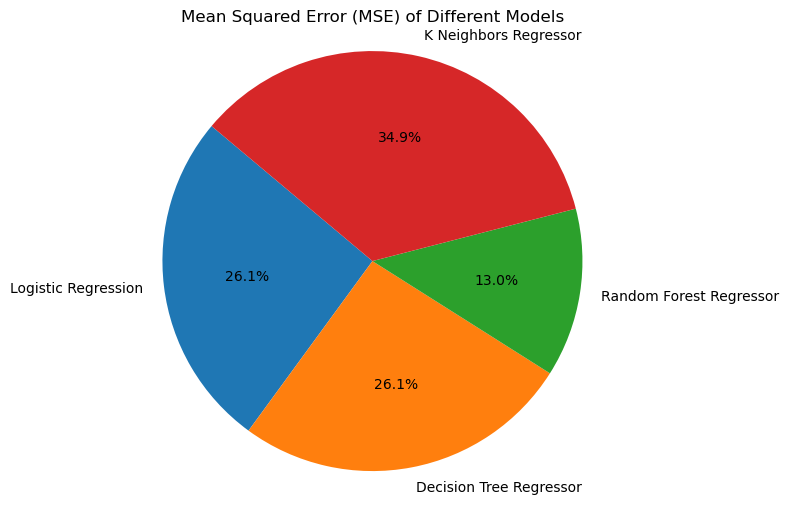

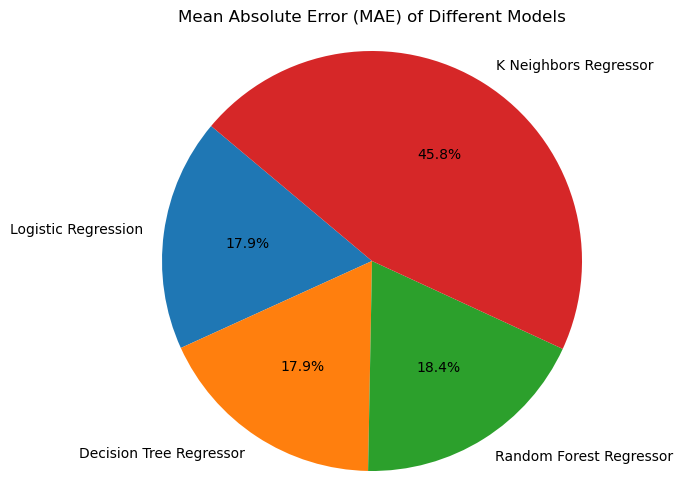

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("heart_failure_clinical_dataset.csv")

X = pd.DataFrame(data, columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                                'ejection_fraction', 'high_blood_pressure', 'platelets',
                                'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'K Neighbors Regressor': KNeighborsRegressor()
}

mse_scores = []
mae_scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    mae_scores.append(mae)
    print(f"{model_name}:")
    print("R2 score:", r2)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("----------")

# Plotting pie chart for Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))
plt.pie(mse_scores, labels=models.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Mean Squared Error (MSE) of Different Models')
plt.axis('equal')
plt.show()

# Plotting pie chart for Mean Absolute Error (MAE)
plt.figure(figsize=(8, 6))
plt.pie(mae_scores, labels=models.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Mean Absolute Error (MAE) of Different Models')
plt.axis('equal')
plt.show()
